***MODEL PREPARATION and TRAINING***

**OBJECTIVE: Train basic ML models on the processed features to predict future stock prices or trends**

Step 1: Define the Target Variables.

Regression: Predict future "Close" Price

Classification: Predict price going Up (1) or Down (0) the next day.

In [14]:
import pandas as pd

df = pd.read_pickle('data/processed/processed_reliance_data.pk1')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2368 entries, 2015-05-29 to 2024-12-31
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              2368 non-null   float64
 1   High               2368 non-null   float64
 2   Low                2368 non-null   float64
 3   Open               2368 non-null   float64
 4   Volume             2368 non-null   int64  
 5   Daily Returns      2368 non-null   float64
 6   Price Range        2368 non-null   float64
 7   Range %            2368 non-null   float64
 8   MA5                2368 non-null   float64
 9   MA10               2368 non-null   float64
 10  MA20               2368 non-null   float64
 11  MA50               2368 non-null   float64
 12  MA100              2368 non-null   float64
 13  StdDev5            2368 non-null   float64
 14  StdDev10           2368 non-null   float64
 15  Lag_1              2368 non-null   float64
 16  Lag_2 

Step 2: Prepare Feature Matrix X and Target y

In [67]:
x = df[['Open', 'High', 'Low', 'Volume', 'Daily Returns']]
y = df['Close']
x.head()

Price,Open,High,Low,Volume,Daily Returns
Date,,,,,
2015-05-29,195.531336,196.986880,194.020239,29277517,0.001370
2015-06-01,195.553539,201.086820,195.109097,19594976,0.028791
2015-06-02,201.275698,204.175659,198.097955,20178960,-0.003990
2015-06-03,199.775740,202.320160,197.442438,15546279,-0.002559
2015-06-04,200.931255,203.597892,198.342392,15931395,0.018241


Step 3 : Train-Test Split

In [68]:
x = x.sort_index()
y = y.sort_index()

In [69]:
# No shuffling, order is preserved
split = int(len(x) * 0.9)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]


In [70]:
y_test.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 237 entries, 2024-01-12 to 2024-12-31
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
237 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


Step 4 : Choose and train ML models

1. Linear Regression

2. Decision Tree Regressor

3. Random Forest Regressor

In [71]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Step 5: Make Predictions

In [72]:
import pandas as pd

predictions = model.predict(x_test)
pred_series = pd.Series(predictions.flatten(), index = y_test.index)
pred_series.info()
pred_series

<class 'pandas.core.series.Series'>
DatetimeIndex: 237 entries, 2024-01-12 to 2024-12-31
Series name: None
Non-Null Count  Dtype  
--------------  -----  
237 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


Date
2024-01-12    1355.667892
2024-01-15    1381.322199
2024-01-16    1374.131699
2024-01-17    1368.485821
2024-01-18    1360.117004
                 ...     
2024-12-24    1228.499381
2024-12-26    1218.400655
2024-12-27    1223.790672
2024-12-30    1213.596766
2024-12-31    1214.301916
Length: 237, dtype: float64

Step 6: Evaluate the model

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE: ', mean_squared_error(y_test, pred_series))
print('R² Score: ', r2_score(y_test, pred_series))

MSE:  32.06539545809381
R² Score:  0.9958493088305858


Step 7: Visualize Actual vs Predicted

In [74]:
print(y_test.shape)
print(pred_series.shape)

(237,)
(237,)


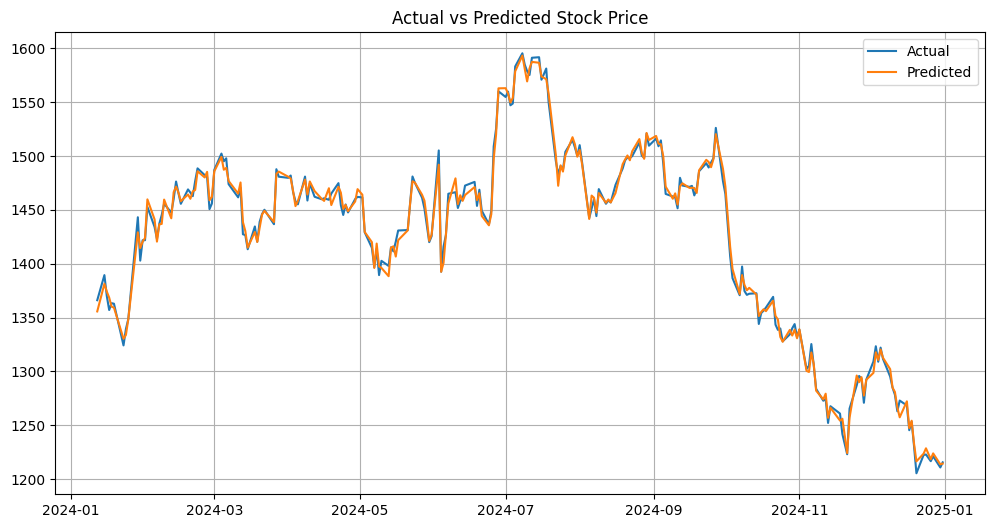

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, pred_series, label='Predicted')
plt.title("Actual vs Predicted Stock Price")
plt.legend()
plt.grid(True)
plt.show()

In [76]:
print(np.allclose(y_test.values.flatten(), predictions.flatten()))


False


In [77]:
# Combine into one DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': pred_series
})

# Preview first few rows
print(comparison_df.head(10))

                 Actual    Predicted
Date                                
2024-01-12  1366.088501  1355.667892
2024-01-15  1389.409424  1381.322199
2024-01-16  1369.975342  1374.131699
2024-01-17  1356.969360  1368.485821
2024-01-18  1363.322876  1360.117004
2024-01-19  1362.824585  1359.160725
2024-01-23  1324.081055  1330.269446
2024-01-24  1339.329346  1333.751749
2024-01-25  1348.498169  1348.373239
2024-01-29  1443.151978  1429.154803
